# Intervalos de Confiança


- <big>${[\bar{x} - Z _{\alpha/2} . \frac{\sigma}{\sqrt{n}}]}$</big>


- <big>${[\bar{x} + Z _{\alpha/2} . \frac{\sigma}{\sqrt{n}}]}$</big>

---

- Parâmetros da fórmula
    - Média: 159,25
    - ( ${\sigma}$ ) Desvio padrão: 13,65
    - ${n}$: quantidade de números
    - ( ${\alpha}$ ) alpha: 1 - confiança (1 - 0.95 = 0,05)
    
    
- <big>${\frac{\alpha}{2} = \frac{0,05}{2} = 0,025, 1 - 0,025 = 0,975}$</big>


- <big>${[159,25 - 1,96 . \frac{13,65}{\sqrt{100}}], [159,25 + 1,96 . \frac{13,65}{\sqrt{100}}] = [156,57, 161,92]}$</big>

---

- Diferença: ${2,67 (159,25 - 156,57}$ ou ${161,92 - 159,57)}$

## Importações

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, t

## Base de dados

In [2]:
data = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

## Cálculo do intervalo de confiança - manual

In [3]:
n = len(data)
n

100

In [4]:
mean = np.mean(data)
mean

159.25

In [5]:
std = np.std(data)
std

13.65

In [6]:
# Intervalo de confiança de 95% (0.95)
alpha = 0.05 / 2
alpha

0.025

In [7]:
1 - alpha

0.975

In [8]:
z = norm.ppf(1 - alpha)
z

1.959963984540054

In [9]:
x_inf = mean - z * (std / math.sqrt(n))
x_inf

156.57464916110283

In [10]:
x_sup = mean + z * (std / math.sqrt(n))
x_sup

161.92535083889717

In [11]:
margin_err = abs(mean - x_sup)
margin_err

2.675350838897174

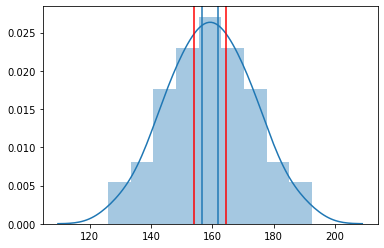

In [12]:
sns.distplot(data)
plt.axvline(x_inf, 0, max(data))
plt.axvline(x_sup, 0, max(data))
plt.axvline(x_inf - margin_err, 0, max(data), c='r')
plt.axvline(x_sup + margin_err, 0, max(data), c='r');

In [13]:
vals = np.unique(data, return_counts=True)[0]
counts = np.unique(data, return_counts=True)[1]
dct_val_counts = [val for val in zip(vals, counts)]
dct_val_counts

[(126.0, 1),
 (129.5, 1),
 (133.0, 2),
 (136.5, 2),
 (140.0, 4),
 (143.5, 6),
 (147.0, 7),
 (150.5, 8),
 (154.0, 9),
 (157.5, 10),
 (161.0, 10),
 (164.5, 9),
 (168.0, 8),
 (171.5, 7),
 (175.0, 6),
 (178.5, 4),
 (182.0, 2),
 (185.5, 2),
 (189.0, 1),
 (192.5, 1)]

## Cálculo do intervalo de confiança - scipy

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [14]:
stats.sem(data)

1.3718766178288244

In [15]:
std / math.sqrt(n-1)

1.3718766178288246

In [16]:
# 95% de confiança que a maior parte das pessoas tem estaturas média entre o "interval"
interval = norm.interval(0.95, mean, stats.sem(data))
interval

(156.5611712378229, 161.9388287621771)

In [17]:
# A margem de erro para o intervalo de confiança 0.95
margin_error = mean - interval[0]
margin_error

2.68882876217711

## Diferentes níveis de confiança

In [18]:
# 99% de confiança que a maior parte das pessoas tem estaturas média entre o "interval"
interval99 = norm.interval(0.99, mean, stats.sem(data))
interval99

(155.71628000694295, 162.78371999305705)

In [19]:
# A margem de erro para o intervalo de confiança 0.99
margin_error99 = mean - interval99[0]
margin_error99

3.5337199930570478

In [20]:
# 80% de confiança que a maior parte das pessoas tem estaturas média entre o "interval"
interval8 = norm.interval(0.8, mean, stats.sem(data))
interval8

(157.49186937268743, 161.00813062731257)

In [21]:
# A margem de erro para o intervalo de confiança 0.8
margin_error8 = mean - interval8[0]
margin_error8

1.7581306273125676

### Exercício

In [22]:
data_sal = np.array([82.1191, 72.8014, 79.1266, 71.3552, 59.192 , 79.1952, 56.518 ,
                          70.3752, 73.5364, 61.0407, 64.3902, 66.4076, 63.5215, 71.9936,
                          60.1489, 78.5932, 76.0459, 67.7726, 64.6149, 80.1948, 76.7998,
                          76.1831, 80.7065, 62.4953, 57.204 , 62.5408, 80.0982, 63.287 ,
                          66.5826, 79.3674])

In [23]:
mean = np.mean(data_sal)
mean

70.14025666666666

In [24]:
std = np.std(data_sal)
std

7.899834598255137

In [25]:
# 95% de confiança da média salarial estar contido no "interval"
interval = norm.interval(0.95, mean, stats.sem(data_sal))
interval

(67.26506308375339, 73.01545024957993)

In [26]:
# A margem de erro para o intervalo de confiança 0.95
margin_error = mean - interval[0]
margin_error

2.875193582913269

## Distribuição T-Student

- Poucos dados e variação não conhecida (30 números)
- Maior dispersão dos dados
- Graus de liberdade
---
- Dados (149,160,147,189,175,168,156,160,152)


- <big>${[\bar{x} - t _{n-1, \alpha/2} . \frac{S}{\sqrt{n}}]}$</big>


- <big>${[\bar{x} + t _{n-1, \alpha/2} . \frac{S}{\sqrt{n}}]}$</big>

---
- Parâmetros da fórmula
    - Média: 161,77
    - ${(\sigma)}$ Desvio padrão da amostra (S): 12,78
    - ${n}$: quantidade de números
    - ${(\alpha)}$: 1 - confiança (1 - 0,95 = 0,05)
    
    
- <big>${t_{n-1} = 8}$</big>


- <big>${\frac{\alpha}{2} = \frac{0,05}{2} = 0,025 = 2,306}$ (consultar tabela)</big>


- <big>${[161,77 - 2,306 . \frac{12,78}{\sqrt{9}}], [161,77 + 2,306 . \frac{12,78}{\sqrt{9}} = [151,94, 171,59]}$</big>


- Diferença: ${9,83 (161,77 - 151,94}$ ou ${171,59 - 161,77)}$

In [27]:
data = np.array([149,160,147,189,175,168,156,160,152]).astype(float)
data

array([149., 160., 147., 189., 175., 168., 156., 160., 152.])

In [28]:
n = len(data)
n

9

In [29]:
mean = data.mean()
mean

161.77777777777777

In [30]:
std = np.std(data)
std

12.786953227391823

In [31]:
interval = t.interval(0.95, n-1, mean, stats.sem(data, ddof = 0))
interval

(151.9488554388298, 171.60670011672573)

In [32]:
margin_err = mean - interval[0]
margin_err

9.828922338947962

## Intervalos de confiança e classificação (ML)

### Accuracy

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [34]:
df = pd.read_csv("CSVs/credit_data.csv")
df.dropna(inplace=True)
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [35]:
X = df.iloc[:,1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [36]:
y = df.iloc[:,4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [37]:
result_nb = []
result_nb_300 = []
result_rl = []
result_rl_300 = []
result_rf = []
result_rf_300 = []

for i in range(30):
    
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    nb = GaussianNB()
    scores = cross_val_score(nb, X, y, cv = kfold)
    result_nb_300.append(scores)
    result_nb.append(scores.mean())
    
    rl = LogisticRegression()    
    scores = cross_val_score(rl, X, y, cv = kfold)
    result_rl_300.append(scores)
    result_rl.append(scores.mean())
    
    rf = RandomForestClassifier()
    scores = cross_val_score(rf, X, y, cv = kfold)
    result_rf_300.append(scores)
    result_rf.append(scores.mean())

In [38]:
len(result_nb), len(result_nb_300)

(30, 30)

In [39]:
print(result_nb)

[0.9248618090452261, 0.9249170854271356, 0.9248894472361808, 0.9228819095477387, 0.9248718592964824, 0.9253894472361809, 0.9243844221105528, 0.9248894472361808, 0.9248718592964824, 0.9238894472361808, 0.9253844221105527, 0.9244020100502512, 0.9253743718592965, 0.924394472361809, 0.9253869346733667, 0.9248819095477387, 0.9258844221105527, 0.924894472361809, 0.9238819095477387, 0.9258844221105529, 0.9258944723618091, 0.9253894472361811, 0.92436432160804, 0.9263844221105527, 0.9228944723618092, 0.9253894472361809, 0.9248869346733668, 0.9253919597989949, 0.9253819095477386, 0.9258844221105527]


In [40]:
print(result_nb_300)

[array([0.91      , 0.93      , 0.96      , 0.925     , 0.94      ,
       0.895     , 0.965     , 0.89949749, 0.87939698, 0.94472362]), array([0.92      , 0.945     , 0.895     , 0.92      , 0.915     ,
       0.93      , 0.89      , 0.94974874, 0.93467337, 0.94974874]), array([0.93      , 0.89      , 0.94      , 0.935     , 0.905     ,
       0.935     , 0.935     , 0.91959799, 0.94472362, 0.91457286]), array([0.91      , 0.945     , 0.95      , 0.94      , 0.92      ,
       0.9       , 0.9       , 0.90954774, 0.91959799, 0.93467337]), array([0.96      , 0.93      , 0.94      , 0.905     , 0.935     ,
       0.93      , 0.905     , 0.90452261, 0.89949749, 0.93969849]), array([0.915     , 0.91      , 0.945     , 0.945     , 0.9       ,
       0.935     , 0.925     , 0.96482412, 0.89949749, 0.91457286]), array([0.955     , 0.935     , 0.915     , 0.94      , 0.905     ,
       0.9       , 0.925     , 0.92462312, 0.92462312, 0.91959799]), array([0.94      , 0.92      , 0.925     , 0.91

In [41]:
np.asarray(result_nb_300).shape

(30, 10)

In [42]:
len(result_rl), len(result_rl_300)

(30, 30)

In [43]:
len(result_rf), len(result_rf_300)

(30, 30)

In [44]:
result_nb = np.array(result_nb)
result_nb_300 = np.array(np.asarray(result_nb_300).reshape(-1))

result_rl = np.array(result_rl)
result_rl_300 = np.array(np.asarray(result_rl_300).reshape(-1))

result_rf = np.array(result_rf)
result_rf_300 = np.array(np.asarray(result_rf_300).reshape(-1))

In [45]:
result_nb_300.shape

(300,)

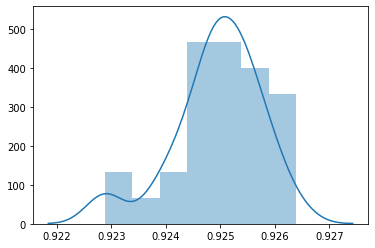

In [46]:
sns.distplot(result_nb);

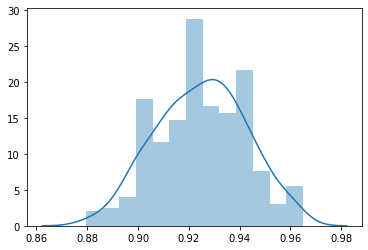

In [47]:
sns.distplot(result_nb_300);

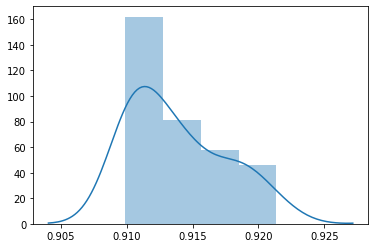

In [48]:
sns.distplot(result_rl);

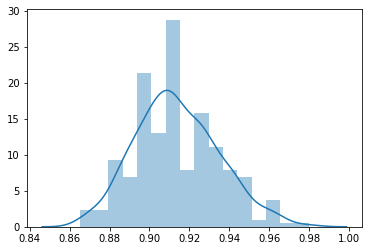

In [49]:
sns.distplot(result_rl_300);

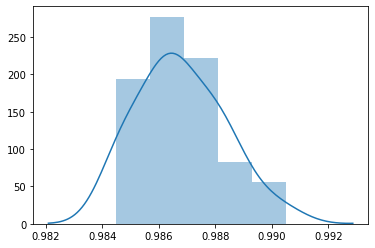

In [50]:
sns.distplot(result_rf);

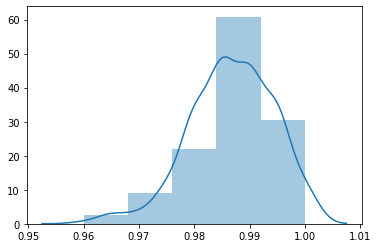

In [51]:
sns.distplot(result_rf_300, bins=5);

In [52]:
result_nb.mean(), result_rl.mean(), result_rf.mean()

(0.9249359296482411, 0.9137817420435511, 0.986780904522613)

In [53]:
stats.variation(result_nb) * 100, stats.variation(result_rl) * 100,stats.variation(result_rf) * 100

(0.08641071566366061, 0.38801026116292653, 0.1535337031343791)

### Intervalos de confiança

### Naive Bayes

In [54]:
interval_nb_t = t.interval(0.95, len(result_nb) - 1,
                           result_nb.mean(),
                           stats.sem(result_nb, ddof = 0))
interval_nb_t

(0.9246374871248957, 0.9252343721715865)

In [55]:
abs(result_nb.mean() - interval_nb_t[1])

0.0002984425233454324

In [56]:
interval_nb_n = norm.interval(0.95, result_nb_300.mean(),
                           stats.sem(result_nb_300))
interval_nb_n

(0.9229333893644709, 0.9269384699320113)

In [57]:
abs(result_nb_300.mean() - interval_nb_n[1])

0.0020025402837702266

### Regressão logística

In [58]:
interval_rl_t = t.interval(0.95, len(result_rl) - 1,
                           result_rl.mean(),
                           stats.sem(result_rl, ddof = 0))
interval_rl_t

(0.9124578055959317, 0.9151056784911705)

In [59]:
abs(result_rl_300.mean() - interval_rl_t[1])

0.0013239364476193005

In [60]:
interval_rl_n = norm.interval(0.95, result_rl_300.mean(),
                           stats.sem(result_rl_300))
interval_rl_n

(0.9114192660020396, 0.9161442180850629)

In [61]:
abs(result_rl_300.mean() - interval_rl_n[1])

0.0023624760415116297

### Random Forest

In [62]:
interval_rf_t = t.interval(0.95, len(result_rf) - 1,
                           result_rf.mean(),
                           stats.sem(result_rf, ddof = 0))
interval_rf_t

(0.9862151788169934, 0.9873466302282327)

In [63]:
abs(result_rf_300.mean() - interval_rf_t[1])

0.0005657257056196352

In [64]:
interval_rf_n = norm.interval(0.95, result_rf_300.mean(),
                           stats.sem(result_rf_300))
interval_rf_n

(0.9859233333239622, 0.9876384757212638)

In [65]:
abs(result_rf_300.mean() - interval_rf_n[1])

0.0008575711986508194

---
Tendo em vista todos os testes realizados, pode-se afirmar com 95% de confiança de que a média de acertos do Random Forest para a base de dados está no intervalo entre 98,61% e 98,72% (Distribuição T-Student) - 98,58% e 98,75% (Distribuição Normal)

---

In [66]:
kfold = KFold(n_splits = 10, shuffle = True)
    
rf = RandomForestClassifier()
scores = cross_val_score(rf, X, y, cv = kfold)
print(scores.mean())

0.9859673366834171
